In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score
from sklearn.datasets import load_diabetes
from sklearn.datasets import make_regression

In [2]:
from sklearn.preprocessing import PolynomialFeatures,StandardScaler

In [4]:
from google.colab import files
uploaded = files.upload()

Saving ushape.csv to ushape.csv


In [10]:
df= pd.read_csv('ushape.csv')
df.head()

,3.159499363321345566e-02,9.869877579082642072e-01,0.000000000000000000e+00
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


In [11]:
x=df.iloc[:,0:2].values
y=df.iloc[:,-1].values

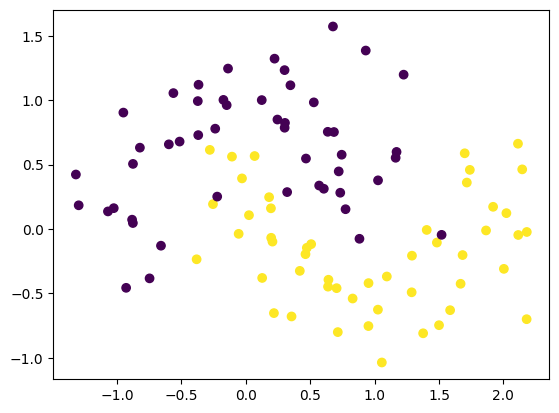

In [14]:
plt.scatter(x[:,0],x[:,1],c=y)

In [15]:
lr = LinearRegression()

In [16]:
lr.fit(x,y)

LinearRegression()

<Axes: >

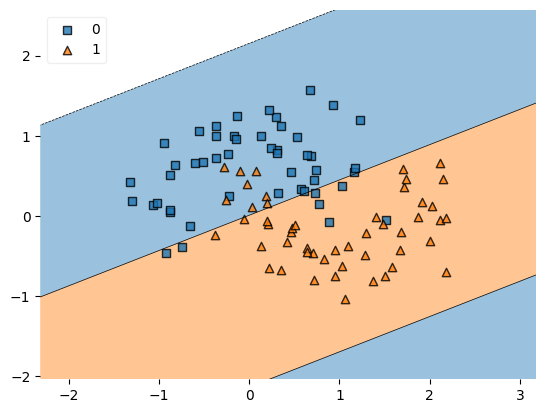

In [17]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x,y.astype('int'),lr,legend=2)

In [20]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(lr,x,y.astype("int"),cv=10))

0.39260525755635023

### **APPLYING POLYNOMIAL**

In [21]:
poly = PolynomialFeatures(degree=3,include_bias=False)
x_trans = poly.fit_transform(x)


### **APPLYING LOGISTIC**

In [23]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
np.mean(cross_val_score(lr,x_trans,y.astype("int"),cv=10))

0.5291580663288759

In [31]:
def plot_decision_boundary(x,y,degree=1):

    poly = PolynomialFeatures(degree=degree)
    x_trf = poly.fit_transform(x)

    clf = LogisticRegression()
    clf.fit(x_trf,y)

    accuracy = np.mean(cross_val_score(clf,x_trf,y,scoring='accuracy',cv=10))

    a=np.arange(start=x[:,0].min()-1, stop=x[:,0].max()+1, step=0.01)
    b=np.arange(start=x[:,1].min()-1, stop=x[:,1].max()+1, step=0.01)


    XX,YY=np.meshgrid(a,b)

    input_array=np.array([XX.ravel(),YY.ravel()]).T

    labels=clf.predict(poly.transform(input_array))

    plt.contourf(XX,YY,labels.reshape(XX.shape),alpha=0.5)
    plt.scatter(x[:,0],x[:,1], c=y)
    plt.title('Degree = {}, accuracy is {}'.format(degree,np.round(accuracy,4)))

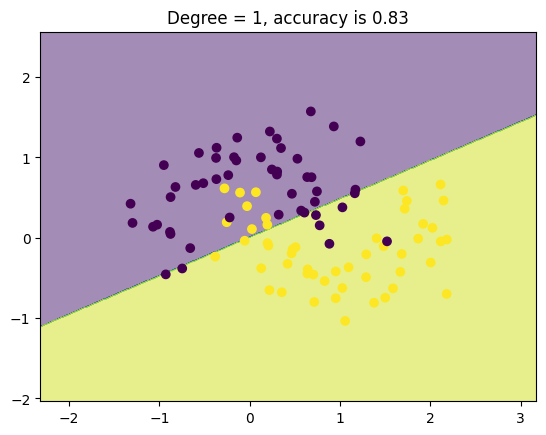

In [34]:
plot_decision_boundary(x,y)

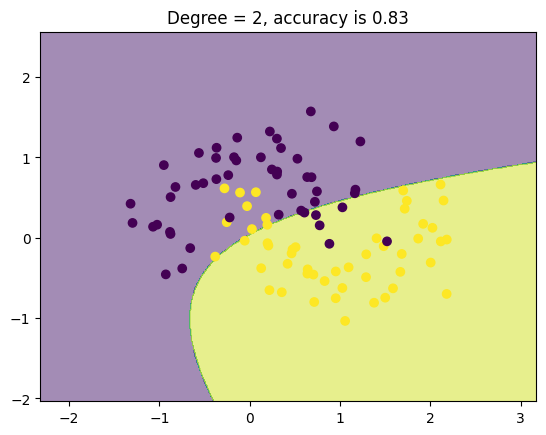

In [35]:
plot_decision_boundary(x,y,degree=2)

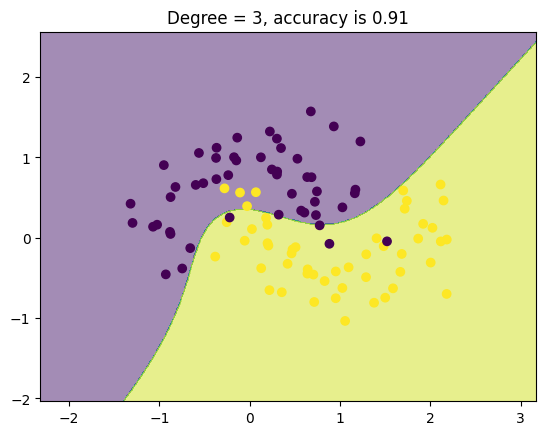

In [36]:
plot_decision_boundary(x,y,degree=3)

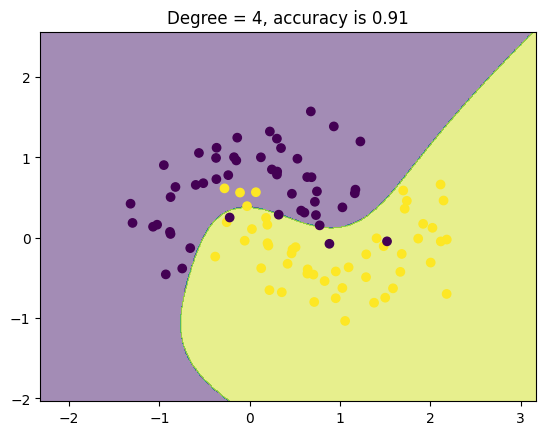

In [37]:
plot_decision_boundary(x,y,degree=4)

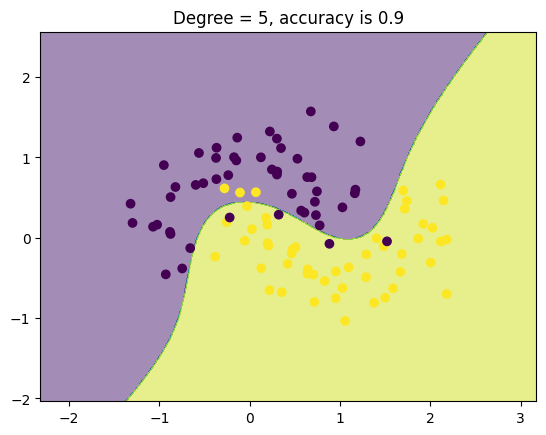

In [38]:
plot_decision_boundary(x,y,degree=5)

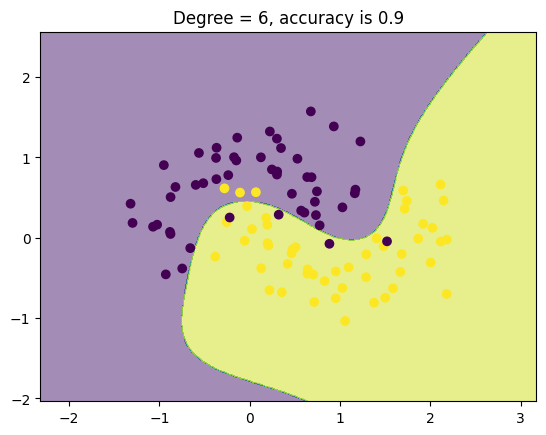

In [39]:
plot_decision_boundary(x,y,degree=6)